First of all, we import some usefull libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import special
from scipy.optimize import newton

We initializate the temporary counter and define next parameters.

In [2]:
s = -25.
n = 6
a = 12

Definimos unha función para determinar puntos dentro e fóra da máscara e o seu raio.

In [3]:
rho_a = np.arange(0, 1, 0.001)
rho_a = np.delete(rho_a, 0)

c = np.arange(0, a, 0.01)
c = np.delete(c, 0)

zeros = sc.special.jn_zeros(1, n + 5) / np.pi

def pass_to_dB(function):
    return 10 * np.log10(function / np.max(function))

def clear_around(function):
    #function[np.where(r > np.pi / 2)] = - 50
    function[np.where(function < - 50)] = - 50

def degrees(angle):
    return 180 * angle / np.pi

def radians(angle):
    return np.pi * angle / 180

Definimos as funcións $F(u, \phi)$

In [4]:
# Real.
u_real = np.array([1.0225, 3.0445, 5.4319, 6.1570, 7.1293])
v_real = np.array([1.1424, 1.0829, 0, 0, 0])

# Complexo.
u_complex_0 = np.array([0.6322, 1.9308, 3.7674, 4.3929, 5.2633])
v_complex_0 = np.array([0.1, 0.1, 0, 0, 0])

u_complex = np.array([0.6322, 1.9308, 3.7674, 4.3929, 5.2633])
v_complex = np.array([0.1, 0.1, 0, 0, 0])

u_complex_1 = np.array([0.5967, 1.7837, 3.6420, 4.3039, 5.2119])
v_complex_1 = np.array([0.5225, 0.5268, 0, 0, 0])

u_complex_r1 = np.array([0.998764, 3.392678, 4.122609, 5.104888])
v_complex_r1 = np.array([1.078004, 0.00100,  0.00100,  0.00100])

u_complex_c2 = np.array([0.61841, 2.54171, 3.22248, 4.15799])
v_complex_c2 = np.array([0.55598, 0.00100, 0.00100, 0.00100])

def _real_(u, Phi, u_real, v_real):
    u = u * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    M = np.count_nonzero(v_real)
    M = 1
    
    n = len(u_real)-1
    for j in np.arange(0, M):
        h_1 *= u_real[j]**4 + v_real[j]**4 + u**4 + 2 * u_real[j]**2 * v_real[j]**2 + 2 * u**2 * (v_real[j]**2 - u_real[j]**2)
        h_2 *= u_real[j]**2 + v_real[j]**2
    
    for j in np.arange(M, n - 1):
        h_1 *= u_real[j]**2 - u**2
        h_2 *= u_real[j]**2
    
    for j in np.arange(0, n + M - 1):
        h_f *= 1 - (u / zeros[j])**2
        
    return ((2 * sc.special.j1(np.pi * u) * h_1) / (h_f * h_2 * np.pi * u))**2

def _complex_(u, Phi, u_complex, v_complex):
    u = u * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    
    n = len(u_complex)-1
    for j in np.arange(0, n - 1):
        h_1 *= u_complex[j]**4 + v_complex[j]**4 + u**4 + 2 * u_complex[j]**2 * v_complex[j]**2 + 2 * u**2 * (v_complex[j]**2 - u_complex[j]**2)
        h_2 *= u_complex[j]**2 + v_complex[j]**2
        h_f *= 1 - (u / zeros[j])**2
    return (2 * sc.special.j1(np.pi * u) / (h_f * np.pi * u))**2 * h_1 / h_2**2

Sacamos uns cortes para mostrar o patrón.

In [5]:
complex_roots_2 = np.zeros(len(c))
complex_roots_3 = np.zeros(len(c))
complex_roots_4 = np.zeros(len(c))
real_roots      = np.zeros(len(c))
r1_roots        = np.zeros(len(c))
c2_roots        = np.zeros(len(c))

for i in range(len(c)):
    complex_roots_2[i] = np.abs(_complex_(c[i], 0, u_complex_0,  v_complex_0))
    complex_roots_3[i] = np.abs(_complex_(c[i], 0, u_complex,    v_complex))
    complex_roots_4[i] = np.abs(_complex_(c[i], 0, u_complex_1,  v_complex_1))
    real_roots[i]      = np.abs(_real_(c[i],    0, u_real,       v_real))
    r1_roots[i]        = np.abs(_real_(c[i],    0, u_complex_r1, v_complex_r1))
    c2_roots[i]        = np.abs(_complex_(c[i], 0, u_complex_c2, v_complex_c2))

complex_roots_2 = pass_to_dB(complex_roots_2)
complex_roots_3 = pass_to_dB(complex_roots_3)
complex_roots_4 = pass_to_dB(complex_roots_4)
real_roots      = pass_to_dB(real_roots)
r1_roots        = pass_to_dB(r1_roots)
c2_roots        = pass_to_dB(c2_roots)

In [6]:
A=np.arccosh(10**(-s/20))/np.pi
zeros=np.zeros(n+1)
u=np.zeros(n+1)

def f(x):
    return sc.special.j1(np.pi*x)

def f0(x):
    return sc.special.j0(x)

i=0;g=0

while zeros[-1]==0:
    try:
        g=np.round(newton(f, i),5)
        if (g in zeros)==False:
            if g>=0:
                zeros[i]=g
    except RuntimeError:
        pass
    i+=1

for i in range(n+1): 
    u[i]=zeros[n]*np.sqrt((A**2+(i-0.5)**2)/(A**2+(n-0.5)**2))    

def G1(x,n):
    h1=1
    for j in np.arange(1,n):
        h1*=1-(x/u[j])**2
    h2=1
    for j in np.arange(1,n):
        h2*=1-(x/zeros[j])**2
    return (f(x)*h1)/(h2*np.pi*x)

F0=np.abs(G1(c,0))
F0=20*np.log10(F0/max(F0))

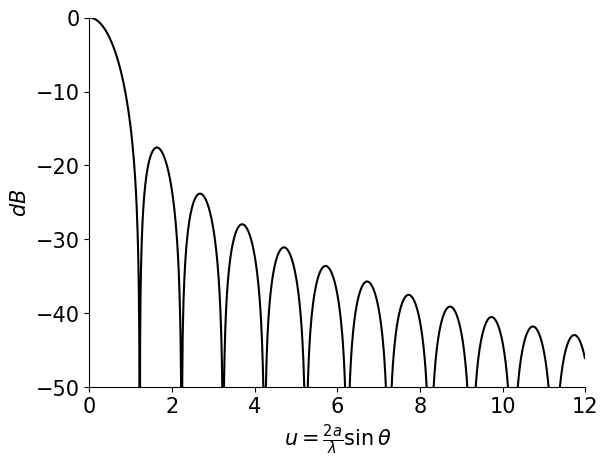

In [7]:
plt.rcParams.update({'font.size': 15})
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(c, F0, 'k')
plt.xlabel(r'$u = \frac{2 a}{\lambda} \sin{\theta}$')
plt.ylabel(r'$dB$')
plt.xlim(0, a)
plt.ylim(-50, 0)
plt.savefig('Patron_1.png', dpi = 350, bbox_inches='tight')
plt.show()

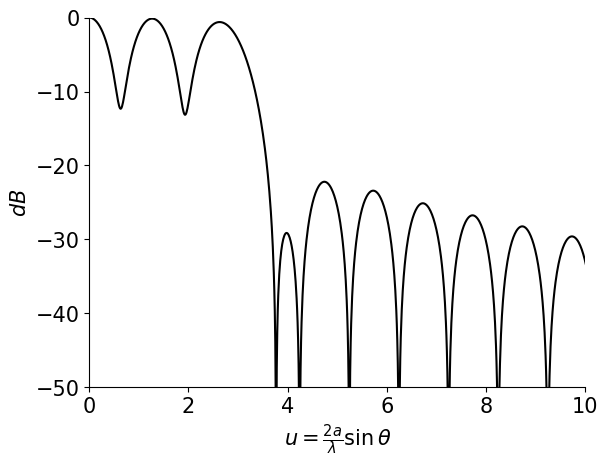

In [8]:
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(c, complex_roots_2, 'k')
plt.xlabel(r'$u = \frac{2 a}{\lambda} \sin{\theta}$')
plt.ylabel(r'$dB$')
plt.xlim(0, 10)
plt.ylim(-50, 0)
plt.savefig('Patron_2.png', dpi = 350, bbox_inches='tight')
plt.show()

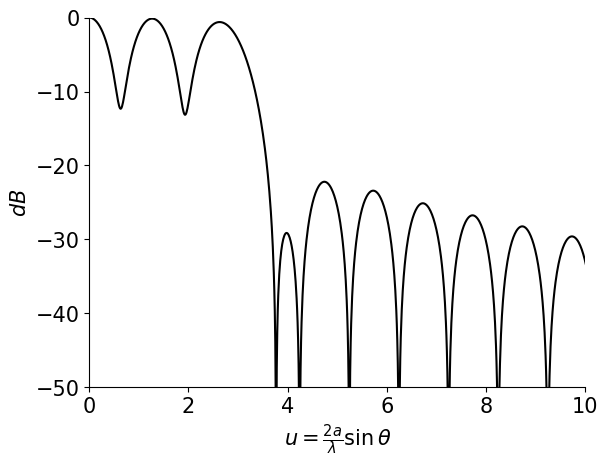

In [9]:
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(c, complex_roots_3, 'k')
plt.xlabel(r'$u = \frac{2 a}{\lambda} \sin{\theta}$')
plt.ylabel(r'$dB$')
plt.xlim(0, 10)
plt.ylim(-50, 0)
plt.savefig('Patron_3.png', dpi = 350, bbox_inches='tight')
plt.show()

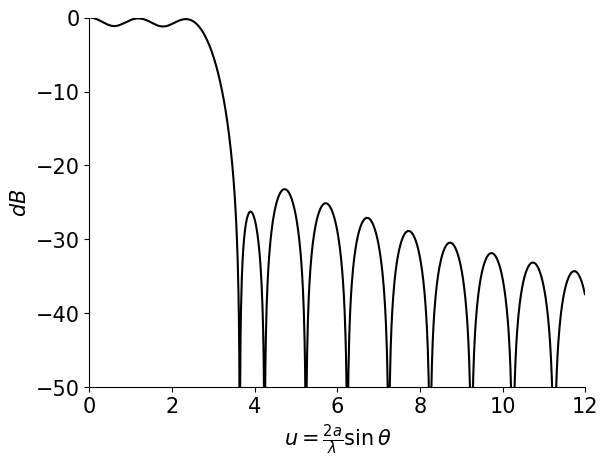

In [10]:
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(c, complex_roots_4, 'k')
plt.xlabel(r'$u = \frac{2 a}{\lambda} \sin{\theta}$')
plt.ylabel(r'$dB$')
plt.xlim(0, a)
plt.ylim(-50, 0)
plt.savefig('Complex_pattern.eps', dpi = 350, bbox_inches='tight')
plt.show()

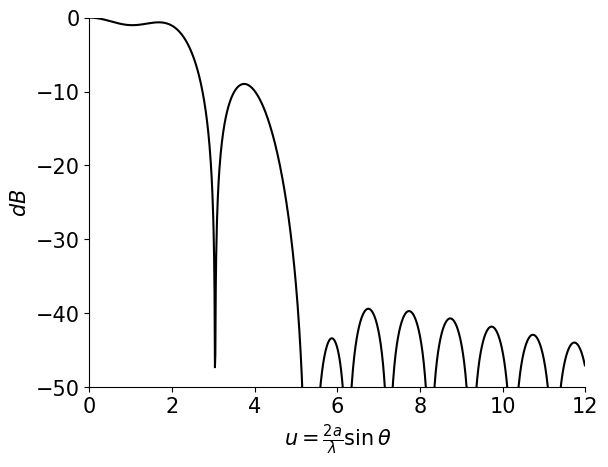

In [11]:
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(c, real_roots, 'k')
plt.xlabel(r'$u = \frac{2 a}{\lambda} \sin{\theta}$')
plt.ylabel(r'$dB$')
plt.xlim(0, a)
plt.ylim(-50, 0)
plt.savefig('Real_pattern.eps', dpi = 350, bbox_inches='tight')
plt.show()

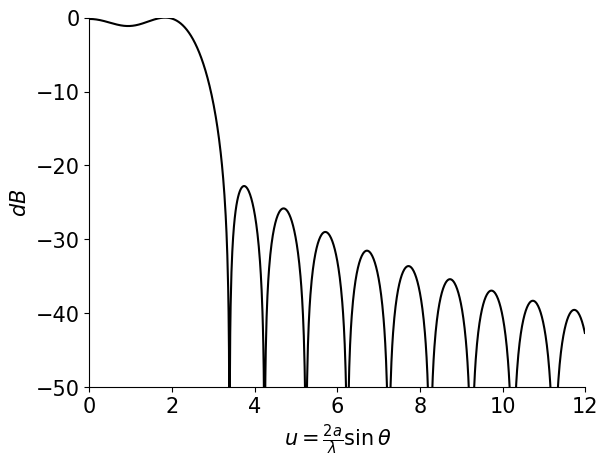

In [12]:
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(c, r1_roots, 'k')
plt.xlabel(r'$u = \frac{2 a}{\lambda} \sin{\theta}$')
plt.ylabel(r'$dB$')
plt.xlim(0, a)
plt.ylim(-50, 0)
plt.savefig('Real_pattern_1.eps', dpi = 350, bbox_inches='tight')
plt.show()

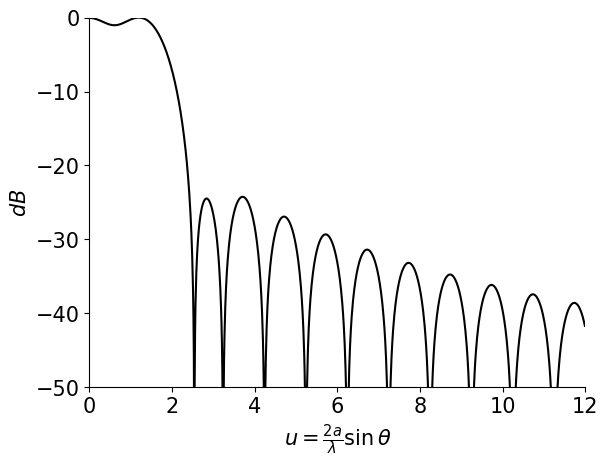

In [13]:
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(c, c2_roots, 'k')
plt.xlabel(r'$u = \frac{2 a}{\lambda} \sin{\theta}$')
plt.ylabel(r'$dB$')
plt.xlim(0, a)
plt.ylim(-50, 0)
plt.savefig('Complex_pattern_1.eps', dpi = 350, bbox_inches='tight')
plt.show()

In [16]:
c[np.argmin(np.abs(c2_roots+3))], c[np.argmin(np.abs(r1_roots+3))]

(1.75, 2.52)

In [17]:
complex_roots_4[np.argmin(np.abs(complex_roots_4+3))], real_roots[np.argmin(np.abs(real_roots+3))]

(-3.032980039103595, -2.9562530595918224)